## Exercise
#### Use CNN to do handwritten digits classification using MNIST dataset. 

#### Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. 

In [288]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [169]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [171]:
x_train.shape

(60000, 28, 28)

In [175]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [203]:
def plot(x,y,idx):
    plt.figure(figsize=(8,1))
    plt.imshow(x[idx])
    plt.title(y[idx])
    plt.axis('off')


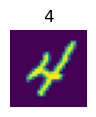

In [209]:
plot(x_train, y_train, 9)

In [185]:
#Normalise
x_train = x_train/255
x_test = x_test/255

In [221]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [290]:
#ANN model
ann = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(70, activation='relu', ),
    layers.Dense(10, activation='softmax'),
                   ])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )
ann.fit(x_train, y_train, epochs=5)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9168 - loss: 0.2948
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1373
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9705 - loss: 0.1012
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0790
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9806 - loss: 0.0645


In [298]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0881


[0.08810590952634811, 0.9732000231742859]

In [300]:
y_p_ann = ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [302]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_ann = [np.argmax(i) for i in y_p_ann]
report = classification_report(y_test, y_pred_ann)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [304]:
unmatched_idx_ann = []
for idx, (i, j) in enumerate(zip(y_pred_ann, y_test)):
    if (i != j):
        unmatched_idx_ann.append(idx)
len(unmatched_idx_ann)

268

In [225]:
#CNN model
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),


    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9476 - loss: 0.1688
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9824 - loss: 0.0566
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9882 - loss: 0.0388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9904 - loss: 0.0303
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9925 - loss: 0.0233


In [226]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9887 - loss: 0.0325


[0.03253372013568878, 0.9886999726295471]

In [235]:
y_p = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [239]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = [np.argmax(i) for i in y_p]
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Got accuracy of 98%

In [271]:
y_pred[551]

2

In [273]:
y_test[551]

7

In [296]:
unmatched_idx = []
for idx, (i, j) in enumerate(zip(y_pred, y_test)):
    if (i != j):
        unmatched_idx.append(idx)
len(unmatched_idx)

113

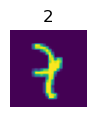

In [275]:
plot(x_test, y_pred, 551)